In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\avocado.csv")
data.drop("Unnamed: 0", axis=1,inplace=True)
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   TotalVolume   1517 non-null   float64
 3   Small         1517 non-null   float64
 4   Large         1517 non-null   float64
 5   XLarge        1517 non-null   float64
 6   TotalBags     1517 non-null   float64
 7   SmallBags     1517 non-null   float64
 8   LargeBags     1517 non-null   float64
 9   XLargeBags    1517 non-null   float64
 10  Type          1517 non-null   object 
 11  Year          1517 non-null   float64
 12  Region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [4]:
data.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [5]:
data.Type.unique()

array(['conventional', nan], dtype=object)

In [6]:
data.Year.unique()

array([2015., 2016.,   nan])

In [7]:
#  Type of Avocado vs Average Price

<Axes: xlabel='AveragePrice', ylabel='Type'>

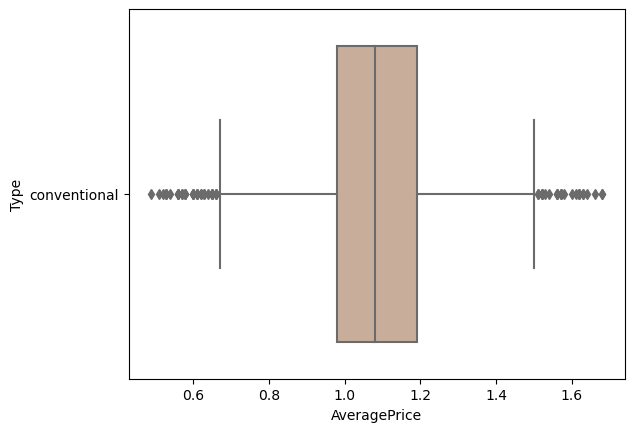

In [8]:
sns.boxplot(y="Type", x="AveragePrice", data=data, palette = 'pink')

In [9]:
# From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit.

In [10]:
label = LabelEncoder()
dicts = {}

label.fit(data.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.Type = label.transform(data.Type)

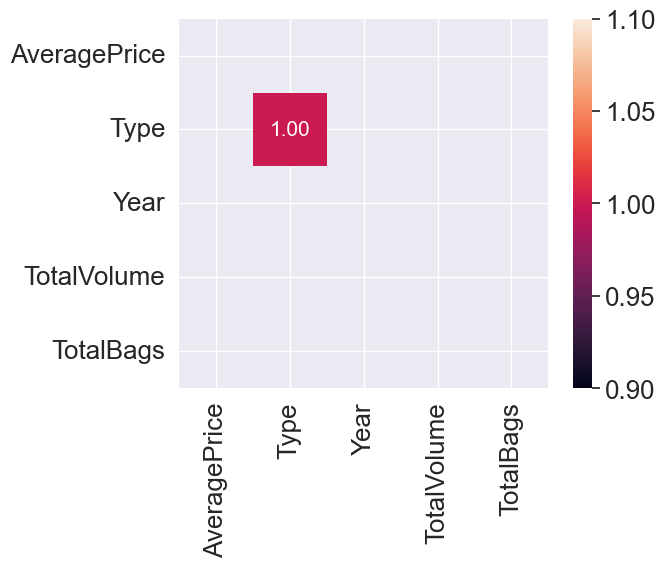

In [11]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)


In [12]:
# Total Volume vs Small, Large and XLarge

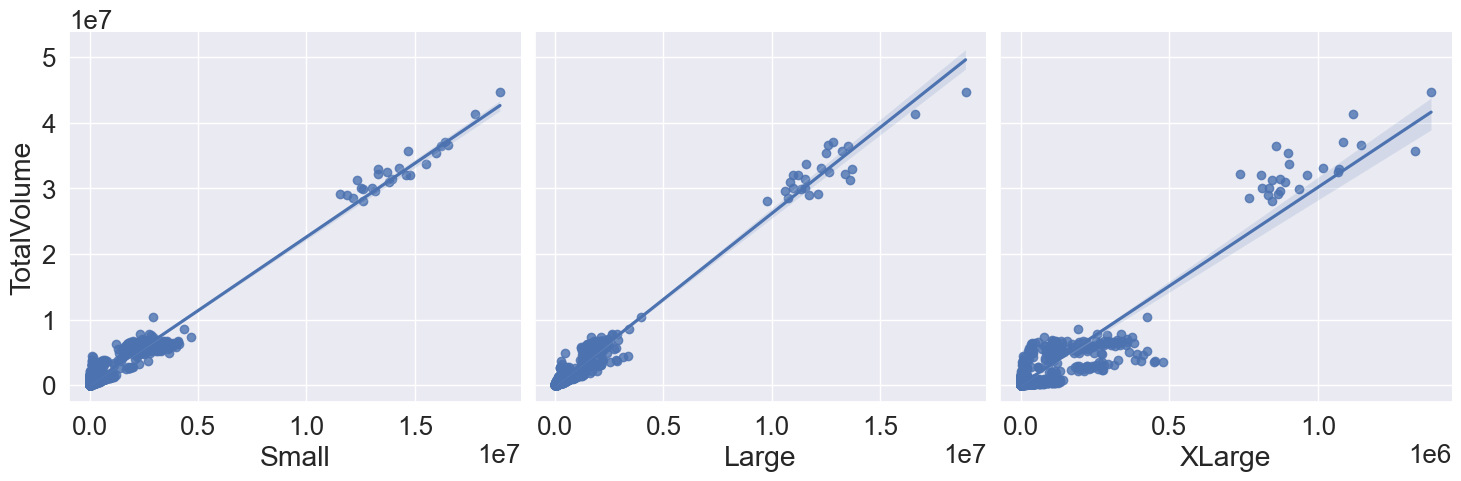

In [13]:
sns.pairplot(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

In [14]:
# Total Bags vs Small Bags, Large Bags and XLarge Bags

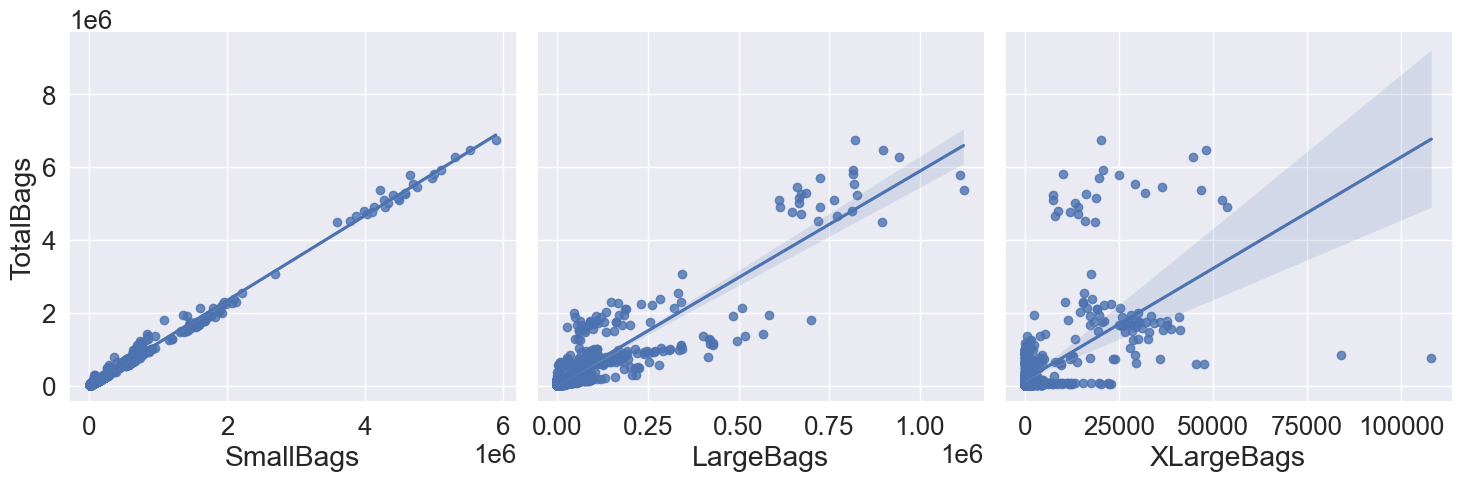

In [15]:
sns.pairplot(data, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

In [17]:
# Region Vs Year distribution¶
# From the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

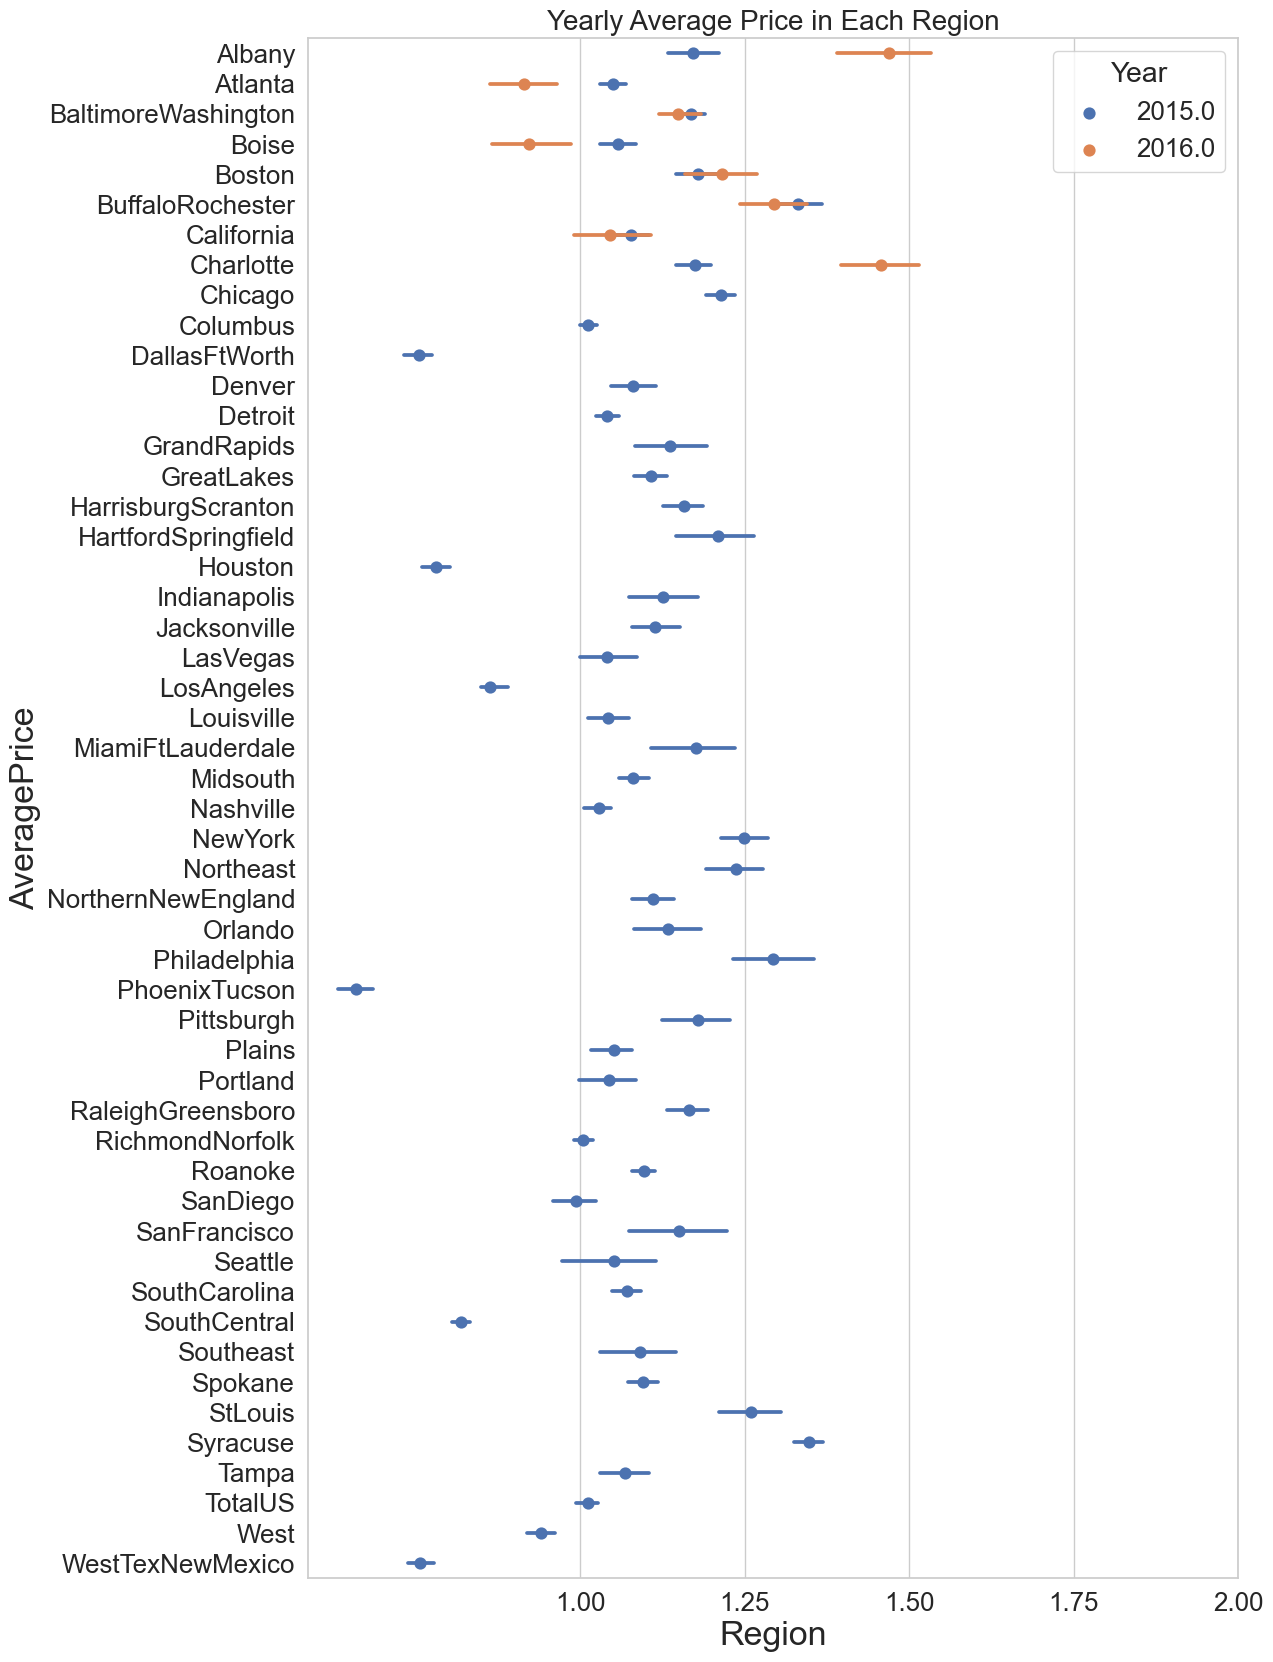

In [18]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

In [19]:
# Region Vs AveragePrice distribution

Text(0.5, 1.0, 'Type Average Price in Each Region')

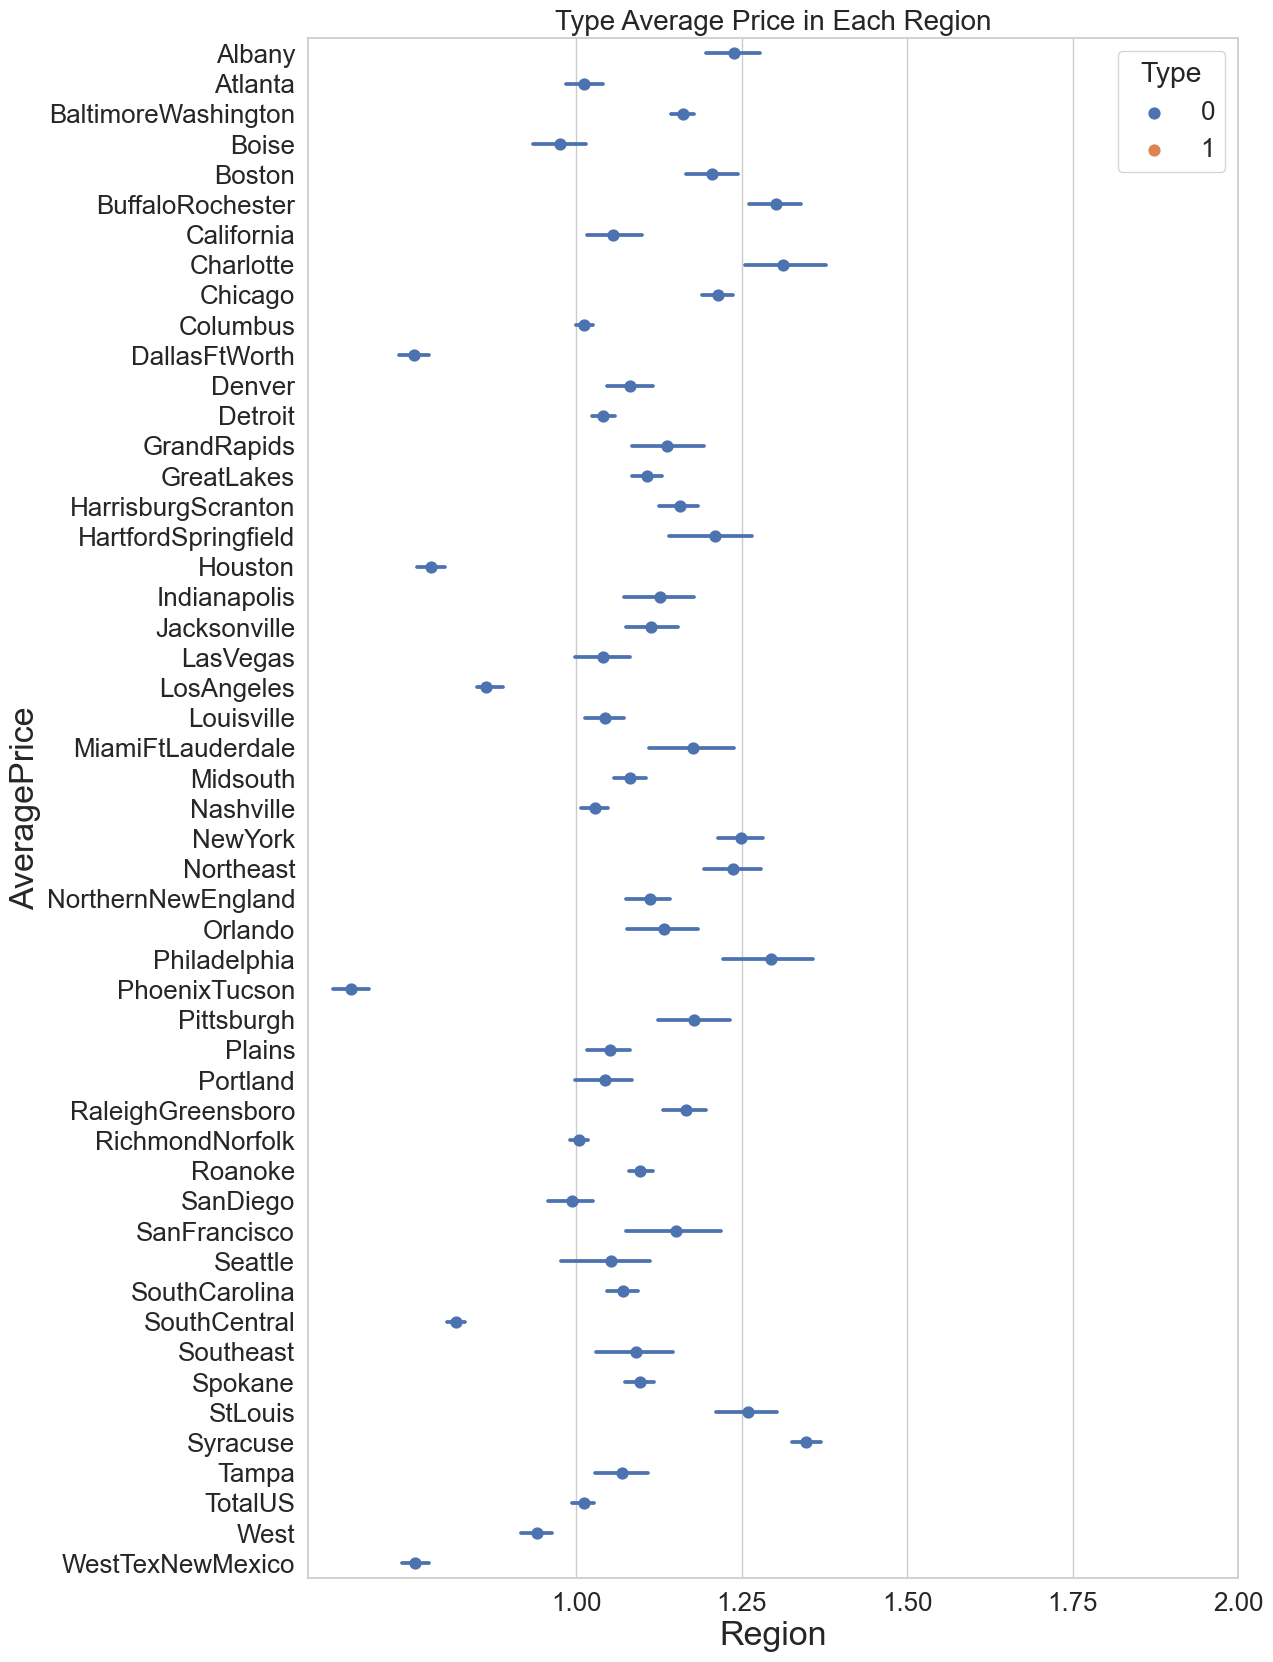

In [20]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='Region', data=data, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [21]:
# Classifying Type of Avocado

In [22]:
# Using Logistic Regression

In [23]:
X=data[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=data.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (13174, 7)
Y Train Shape  (13174,)
X Test Shape  (3294, 7)
Y Test Shape  (3294,)


In [27]:
# Predicting Average Price of Avocado

In [28]:
data.drop(['Date', 'TotalVolume', 'TotalBags', 'Region', 'Year'], axis = 1,inplace = True)

In [29]:
data.columns

Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags',
       'XLargeBags', 'Type'],
      dtype='object')

In [30]:
# We are calculting Average price of Avocado considering columns:
# ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']

In [31]:
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,1.350481,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727,-3.139369
1,1.456397,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727,-3.139369
2,-0.767838,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727,-3.139369
3,0.026531,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727,-3.139369
4,1.085691,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727,-3.139369


In [32]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [33]:
y = data_avocado.AveragePrice

In [34]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [35]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (13174, 7)
y_train shape:  (13174,)

Test cases as below
X_test shape:  (3294, 7)
y_test shape:  (3294,)


In [46]:
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,1.350481,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727,-3.139369
1,1.456397,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727,-3.139369
2,-0.767838,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727,-3.139369
3,0.026531,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727,-3.139369
4,1.085691,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727,-3.139369
